**How to save this notebook to your personal Drive**

To copy this notebook to your Google Drive, go to File and select "Save a copy in Drive", where it will automatically open the copy in a new tab for you to work in. This notebook will be saved into a folder on your personal Drive called "Colab Notebooks".


Still stumped? Check out <a href="https://www.youtube.com/watch?v=qaJ2UpMPXKk"> this video</a> for help <br><br>
Please remember to rename this with your last name replacing "STUDENT".

# Looking at the dimuon spectrum over a wide energy range

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Mesons.
</ul>

<b>Background</b>

To determine the mass ($m$) of a particle you need to know the 4-momenta of the particles ($\mathbf{P}$) that are detected after the collision: the energy ($E$), the momentum in the x direction ($p_x$), the momentum in the y direction ($p_y$), the momentum in the z direction ($p_z$).

$$\mathbf{P} = (E,p_x,p_y,p_z)$$


\begin{equation*} m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)} \end{equation*}

Some particles are very unstable and decay (turn into) to two or more other particles. In fact, they can decay so quickly, that they never interact with your detector! Yikes!

However, we can reconstruct the parent particle (sometimes referred to as <b>the initial state particle</b>) and its 4-momentum by adding the 4-momenta of the child particles (sometimes referred to as <b>the decay products</b>). 

$$\mathbf{P_{\rm parent}} = \mathbf{P_{\rm child 0}} + \mathbf{P_{\rm child 1}} + \mathbf{P_{\rm child 2}} + ...$$



which breaks down into...

$$E_{\rm parent} = E_{\rm child 0} + E_{\rm child 1} + E_{\rm child 2} + ...$$

$$p_{\rm x parent} = p_{\rm x child 0} + p_{\rm x child 1} + p_{\rm x child 2} + ...$$

$$p_{\rm y parent} = p_{\rm y child 0} + p_{\rm y child 1} + p_{\rm y child 2} + ...$$

$$p_{\rm z parent} = p_{\rm z child 0} + p_{\rm y child 1} + p_{\rm z child 2} + ...$$


<b>Let's code!</b>

Here is some very, very basic starter code. It reads in data from the CMS experiment. 

If you haven't already, you will want to go through the <a href="https://colab.research.google.com/drive/1TFvNoq-i8isZoAwnZubRnNM0CrMGXUmP">CMS data model</a> (also included when you cloned this directory) exercise so you know how to pull out the relevant information. 

The following example runs with 1000 events that are included with this repository. To better see the full phyiscs, you can download a bigger file, <code>dimuons_100k.dat</code>. To download this file, see the <a href="https://colab.research.google.com/drive/174AUxy9qTqQ1XndbJW_Wryz9m95QZRIk">download_more_data</a> exercise, also included in this repository.

<b>NOTE: If you are getting an error saying that there is no module "pps_tools", go to Runtime, and then select Restart runtime. Also make sure that your runtime type is Python 3. </b>

In [1]:
###### This cell need only be run once per session ##############
###### Make sure your runtime type is Python 3 #########

# Import h5hep from Github. This is to allow us to read these
# particular files. 
!pip install git+https://github.com/mattbellis/h5hep.git

# Import custom tools package from Github. These are some simple accessor functions
# to make it easier to work with these data files. 
!pip install git+https://github.com/mattbellis/particle_physics_simplified.git

import pps_tools as pps
import h5hep

  Cloning https://github.com/mattbellis/h5hep.git to /tmp/pip-req-build-odpiwxxw
  Running command git clone --filter=blob:none --quiet https://github.com/mattbellis/h5hep.git /tmp/pip-req-build-odpiwxxw
  Resolved https://github.com/mattbellis/h5hep.git to commit d9adc7dc7f7e3a3ec60671c731bf74a5f83e4e30
  Preparing metadata (setup.py) ... done
  Created wheel for h5hep: filename=h5hep-0.9-py3-none-any.whl size=19766 sha256=3103ec33287b3f77a16744b720ff8e1113a15ab03deff2507f6355f68f35d7a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-3xafh35w/wheels/4d/9a/b1/eb2b2bdbe588e10e0e1f643393d224d1e4d70a601879a3f0a1
Successfully built h5hep
  Cloning https://github.com/mattbellis/particle_physics_simplified.git to /tmp/pip-req-build-nqm5rae0
  Running command git clone --filter=blob:none --quiet https://github.com/mattbellis/particle_physics_simplified.git /tmp/pip-req-build-nqm5rae0
  Resolved https://github.com/mattbellis/particle_physics_simplified.git to commit fd04ea78e00966134ac90f1bc

In [2]:
###### This cell need only be run once per session ############################

# Fetch data file
pps.download_from_drive('dimuons_100k.hdf5')

In [3]:
# open and read data file
infile = 'data/dimuons_100k.hdf5'
collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0
Reading in event  10000
Reading in event  20000
Reading in event  30000
Reading in event  40000
Reading in event  50000
Reading in event  60000
Reading in event  70000
Reading in event  80000
Reading in event  90000


<h2><font color="red">Challenge!</font></h2>

Use the sample code to find the mass of the particle that the two muons came from (parent particle). 

To do this, you will need to loop over all pairs of muons for each collision, sum their 4-momenta (energy, px, py, and pz) and then use that to calculate the invariant mass. 

Do this for all possible pairs and in addition, break it down so that you calculate the invariant mass for the cases where:
* Both muons are positively charged.
* Both muons are negatively charged.
* The muons have opposite charges.

Be careful. Some collisions may have more than 2 muons, so write your code such that it calculates all possible pairs of muons in a given collisions. For example, if there are 3 muons in a collision, there are 3 possible pairs that you can make. 

<i>Hint!</i>

It is very likely that a particle exists where there is a peak in the data. However, this is not always true. 
A peak in the data is most likely the mass of a particle. You can look at the approximate mass to figure out which particle 
is found in the data.

Your histogram should look something like the following sketch. The value of the peaks should be the mass of a particle. You should be able to find two particles in their ground state. <a href="http://en.wikipedia.org/wiki/J/psi_meson">Check your answer for the first particle!</a> <a href="http://en.wikipedia.org/wiki/Upsilon_meson">Check your answer for the second particle!</a> 

In [40]:
# Data Analysis

import numpy as np   # Import numpy for use in calculations
import itertools     # Import the itertools module, which will allow for the splitting of the data into pairs
# Information about using itertools to make pairs found at https://stackoverflow.com/a/5360340

masses = []
masses_pos = []
masses_neg = []
masses_opp = []
for collision in collisions:
    muons = collision['muons']
    pairs = itertools.combinations(muons, 2)
    for pair in pairs:
        muon_1 = pair[0]
        muon_2 = pair[1]
        e_1 = muon_1['e']
        e_2 = muon_2['e']
        px_1 = muon_1['px']
        px_2 = muon_2['px']
        py_1 = muon_1['py']
        py_2 = muon_2['py']
        pz_1 = muon_1['pz']
        pz_2 = muon_2['pz']
        q_1 = muon_1['q']
        q_2 = muon_2['q']
        e_src = e_1 + e_2
        px_src = px_1 + px_2
        py_src = py_1 + py_2
        pz_src = pz_1 + pz_2
        masses.append(np.sqrt(e_src**2 - (px_src**2 + py_src**2 + pz_src**2)))
        if q_1 + q_2 > 0:
            masses_pos.append(np.sqrt(e_src**2 - (px_src**2 + py_src**2 + pz_src**2)))
        if q_1 + q_2 < 0:
            masses_neg.append(np.sqrt(e_src**2 - (px_src**2 + py_src**2 + pz_src**2)))
        if q_1 + q_2 == 0:
            masses_opp.append(np.sqrt(e_src**2 - (px_src**2 + py_src**2 + pz_src**2)))

Text(0.5, 1.0, 'Invariant Mass Distribution (All Pairs)')

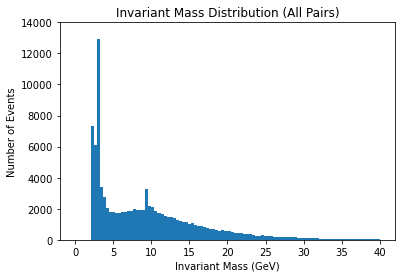

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.hist(masses, bins = 100, range = (0, 40))
axes = plt.gca()
axes.set_ylim([0,14000])
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Events')
plt.title('Invariant Mass Distribution (All Pairs)')

Text(0.5, 1.0, 'Invariant Mass Distribution (Positive Pairs)')

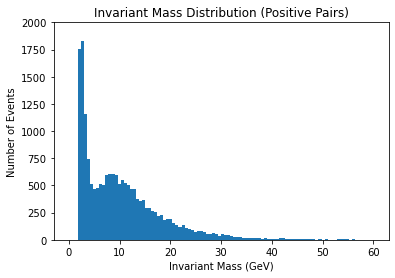

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.hist(masses_pos, bins = 100, range = (0, 60))
axes = plt.gca()
axes.set_ylim([0,2000])
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Events')
plt.title('Invariant Mass Distribution (Positive Pairs)')

Text(0.5, 1.0, 'Invariant Mass Distribution (Negative Pairs)')

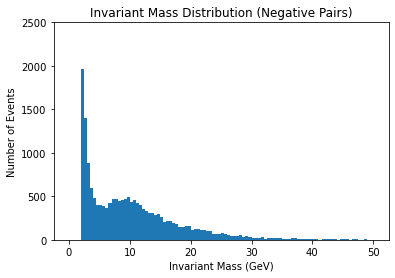

In [43]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.hist(masses_neg, bins = 100, range = (0, 50))
axes = plt.gca()
axes.set_ylim([0,2500])
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Events')
plt.title('Invariant Mass Distribution (Negative Pairs)')

Text(0.5, 1.0, 'Invariant Mass Distribution (Opposite Pairs)')

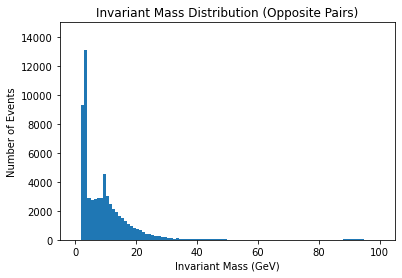

In [44]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.hist(masses_opp, bins = 100, range = (0, 100))
axes = plt.gca()
axes.set_ylim([0,15000])
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Events')
plt.title('Invariant Mass Distribution (Opposite Pairs)')

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/particle-physics-playground/playground/master/activities/images/dimuons_sketch.jpeg')

#### Comments

Depending on which file you ran over, you may see hints of particles below 20 GeV/c$^2$. It is possible you see signs of other particles at even higher energies. Plot your masses over a wide range of values, but then zoom in (change the plotting range) on different mass ranges to see if you can identify these particles. <br>
NOW: Discuss what a dimuon is and where it fits into the Standard Model (or does it?). Include information about when it was found and by whom, and as much information as you can, properly cited (intellectual honesty!).

These two particles appear to be the J/psi meson and the Upsilon meson based on their masses.

A dimuon is a system of particles which contains two muons. They are of interest, as they are thought to be a possible decay product of the Higgs boson (1), and certain recorded dimuon events challenge established predictions and can appear to contradict the Drell-Yan model if certain assumptions are to be made (2). Their presence also implies the production of charmed particles (3). These systems have been known since at least 1985 based on the references I have found, although I could not find any specific information about its discovery. <br>
<br>
(1) ATLAS Collaboration (2007). A search for the dimuon decay of the Standard Model Higgs boson with the ATLAS detector. $\it{Phys. Lett. B. 812}$ (2021), 28. https://doi.org/10.48550/arXiv.2007.07830. <br>
(2) Barger, V. and Phillips, R. J. N. (1985). Standard-model dimuon sources in $p\bar{p}$ collisions. $\it{Phys. Rev. D, 32}$ (1128). https://doi.org/10.1103/PhysRevD.32.1128. <br>
(3) Poulsen, C. Dimuon Analysis. https://inis.iaea.org/collection/NCLCollectionStore/_Public/29/003/29003438.pdf.